In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configure visuals
sns.set_style('whitegrid')
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Cell 2: Load and Clean the Data

# 1. Load the CSV file
df = pd.read_csv('data.csv')

# 2. Remove the 'id' column (it does not help predict cancer)
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# 3. Remove 'Unnamed: 32' if it exists (an empty error column common in this dataset)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

# 4. Convert Diagnosis letters to numbers
# M (Malignant/Cancer) -> 1
# B (Benign/Safe) -> 0
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check the data shape
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Cell 3: Split Data into Training and Testing sets

# X = All columns EXCEPT 'diagnosis'
X = df.drop('diagnosis', axis=1)

# y = ONLY the 'diagnosis' column
y = df['diagnosis']

# Split: 80% Training, 20% Testing
# random_state=42 ensures you get the same result every time (good for science!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (455, 30)
Testing data shape: (114, 30)


In [4]:
# Cell 4: Train Model A (Full Feature Set)

# Initialize the Random Forest
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_full.fit(X_train, y_train)

# Make predictions on the test data
y_pred_full = rf_full.predict(X_test)

print("Model A (Full) trained successfully.")

Model A (Full) trained successfully.


--- Model A (All 30 Features) Performance ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



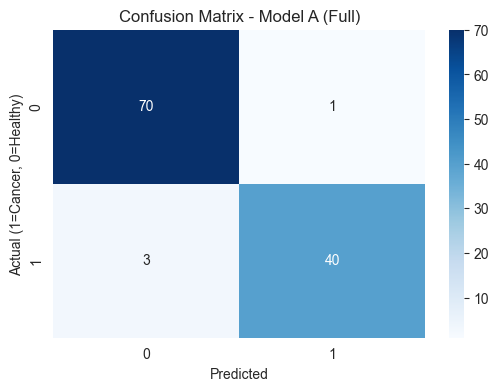

In [5]:
# Cell 5: Evaluate Model A

print("--- Model A (All 30 Features) Performance ---")
acc_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy: {acc_full:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_full))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_full), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Model A (Full)')
plt.ylabel('Actual (1=Cancer, 0=Healthy)')
plt.xlabel('Predicted')
plt.show()

C:\Users\Jared\AppData\Local\Temp\ipykernel_18168\3768174788.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


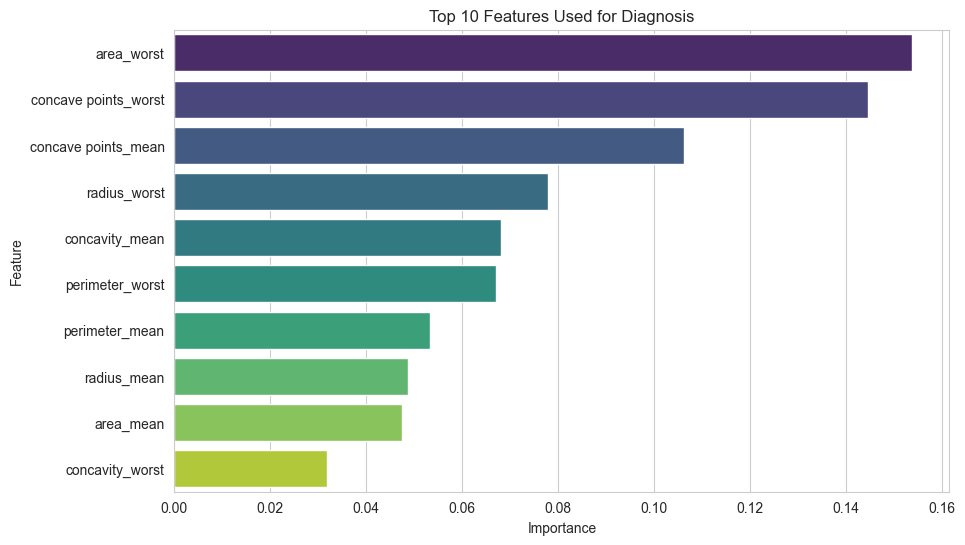

Top 5 Features identified: ['area_worst' 'concave points_worst' 'concave points_mean' 'radius_worst'
 'concavity_mean']


In [6]:
# Cell 6: Find the Top 5 Features

# Get importance scores from the trained model
importances = rf_full.feature_importances_
feature_names = X.columns

# Create a DataFrame to sort and view them
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the Top 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Used for Diagnosis')
plt.show()

# Save the top 5 feature names for the next step
top_5_features = feature_importance_df['Feature'].head(5).values
print(f"Top 5 Features identified: {top_5_features}")

In [7]:
# Cell 7: Train Model B (Lite Version)

# Create new datasets containing ONLY the top 5 columns
X_train_lite = X_train[top_5_features]
X_test_lite = X_test[top_5_features]

# Train the new Lite Model
rf_lite = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lite.fit(X_train_lite, y_train)

# Make predictions
y_pred_lite = rf_lite.predict(X_test_lite)

print("Model B (Lite) trained successfully.")

Model B (Lite) trained successfully.


--- Model B (Top 5 Features Only) Performance ---
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\Jared\AppData\Local\Temp\ipykernel_18168\1006666202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Model A (30 Features)', 'Model B (5 Features)'], y=[acc_full, acc_lite], palette='magma')


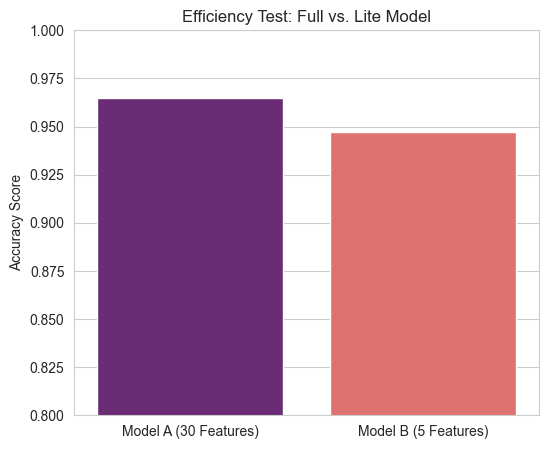

Accuracy with 30 features: 96.49%
Accuracy with 5 features:  94.74%
Performance Difference:    1.75%


In [8]:
# Cell 8: Final Comparison

print("--- Model B (Top 5 Features Only) Performance ---")
acc_lite = accuracy_score(y_test, y_pred_lite)
print(f"Accuracy: {acc_lite:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lite))

# Visual Comparison Bar Chart
plt.figure(figsize=(6,5))
sns.barplot(x=['Model A (30 Features)', 'Model B (5 Features)'], y=[acc_full, acc_lite], palette='magma')
plt.ylim(0.8, 1.0) # Zoom in to make the difference visible
plt.title('Efficiency Test: Full vs. Lite Model')
plt.ylabel('Accuracy Score')
plt.show()

# Calculate the numeric drop
drop_off = (acc_full - acc_lite) * 100
print(f"Accuracy with 30 features: {acc_full:.2%}")
print(f"Accuracy with 5 features:  {acc_lite:.2%}")
print(f"Performance Difference:    {drop_off:.2f}%")

In [ ]:
# Cell 9: Visualise Confusion Matrix for Model B (Lite)

plt.figure(figsize=(6,4))
# We compare y_test (Actual) vs y_pred_lite (Model B's predictions)
sns.heatmap(confusion_matrix(y_test, y_pred_lite), annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix - Model B (Lite / 5 Features)')
plt.ylabel('Actual (1=Cancer, 0=Healthy)')
plt.xlabel('Predicted')
plt.show()